## Finding Arduino Ports
When working with Arduino, it's essential to know which port your Arduino board is connected to on your computer. This is necessary for uploading code and communicating with the board. Each port is identified by a unique name or number, depending on the operating system:

- On Windows, ports are named like `COM3`, `COM4`, etc.
- On macOS and Linux, ports are named like `/dev/ttyUSB0`, `/dev/ttyACM0`, etc.

Run the next cell to know the port number.


In [1]:
import serial.tools.list_ports

def list_all_ports():
    ports = serial.tools.list_ports.comports()

    if not ports:
        print("No serial ports found.")
    else:
        print("Available serial ports:")
        for port in ports:
            print(f"Port: {port.device}, Description: {port.description}")

list_all_ports()

Available serial ports:
Port: /dev/cu.debug-console, Description: n/a
Port: /dev/cu.Bluetooth-Incoming-Port, Description: n/a
Port: /dev/cu.usbmodem1301, Description: Nano 33 BLE
Port: /dev/cu.usbmodem1401, Description: Nano 33 BLE


#### Setup the serial communication with arduino

Change the port value in the next cell with the result that you got in the previous cell

In [10]:
import serial
import time

port = '/dev/cu.usbmodem1401' 
baudrate = 115200
duration = 10

import serial

def read_serial_and_save(file_path):
    with serial.Serial(port, baudrate) as arduino, open(file_path, 'w') as file:
        arduino.timeout = 1  # Set timeout for serial read
        end_time = time.time() + duration  # Run for 'duration' seconds
        while time.time() < end_time:
            if arduino.in_waiting > 0:
                data = arduino.readline().decode().strip()
                file.write(data + '\n')
                print(data)

if __name__ == "__main__":
    save_path = "received_data.txt"
    read_serial_and_save(save_path)


21
24
26
25
24
24
24
24
26
25
25
24
25
21
22
21
24
25
25
24
22
22
22
23
25
25
25
24
25
23
23
24
25
24
24
23
24
25
25
25
26
24
22
21
21
21
25
24
23
25
22
23
23
20
23
25
25
25
25
24
21
22
24
24
25
25
24
23
21
20
24
25
25
24
25
25
22
24
20
24
25
25
26
23
24
23
24
21
21
25
24
24
24
24
22
22
24
22
26
26
25
24
26
24
24
23
25
26
23
25
24
24
24
25
22
25
24
24
23
25
24
24
25
25
24
21
22
22
25
28
25
26
26
24
25
23
23
24
20
23
23
24
24
26
24
24
24
24
20
24
25
23
25
26
22
24
22
24
25
25
24
25
25
24
24
25
25
25
26
24
24
24
22
23
22
24
24
24
25
25
20
22
24
24
25
24
25
25
26
26
24
26
25
26
25
24
23
26
24
24
23
26
25
24
24
25
25
25
25
23
25
25
25
25
21
22
22
26
26
24
24
22
22
25
25
25
25
25
24
23
22
25
25
25
23
24
22
21
21
22
23
25
25
24
24
23
22
24
26
24
22
24
22
25
25
25
25
23
24
24
25
25
24
22
23
24
24
26
24
26
24
26
24
23
23
23
22
21
25
25
25
26
24
24
23
25
25
22
23
20
23
22
24
25
25
24
22
22
21
24
23
24
24
24
24
22
23
25
21
24
26
23
25
23
22
20
24
24
23
24
23
24
26
25
25
24
22
23
23
25
21
22
22
2

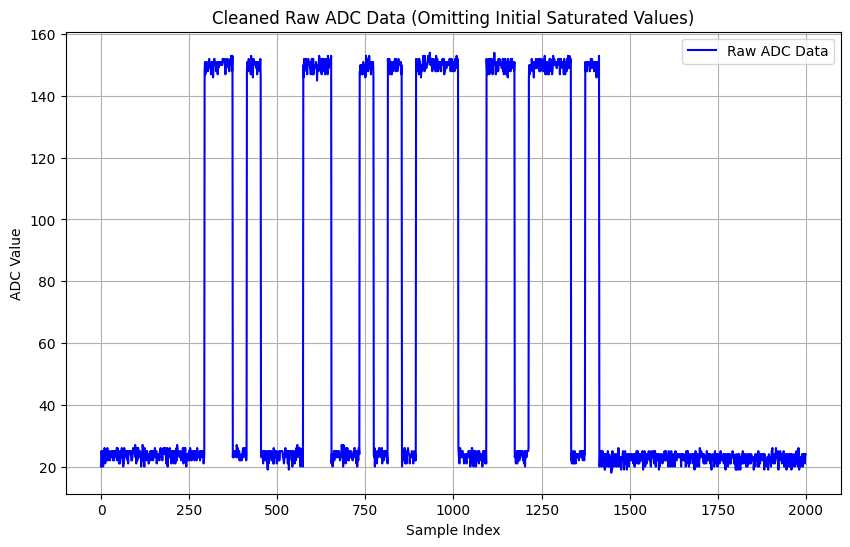

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_raw_data(file_path):
    """
    Reads the raw ADC values from a file.
    
    :param file_path: Path to the file containing raw ADC values
    :return: A list of raw ADC values
    """
    with open(file_path, 'r') as file:
        raw_data = [int(line.strip()) for line in file.readlines()]
    return raw_data

def clean_data(raw_data, threshold=100):
    """
    Cleans the raw data by omitting the initial saturated values (both 0 and 1).
    
    :param raw_data: List of raw ADC values
    :param threshold: ADC threshold to classify the sample as 0 or 1 (default: 100)
    :return: Cleaned data with initial saturated values removed
    """
    # Start by finding the first non-saturated value
    cleaned_data = []
    for value in raw_data:
        if value > threshold:  # Value is not saturated, add to the cleaned data
            cleaned_data.append(value)
    
    # Return the cleaned data (values after the initial saturated ones)
    return cleaned_data

# Path to the file containing raw ADC values
file_path = 'received_data.txt'  # Update the path if needed

# Step 1: Read the raw data from the file
raw_data = read_raw_data(file_path)

# Step 2: Clean the data by removing the initial saturated values
cleaned_data = clean_data(raw_data, threshold=100)

raw_data = raw_data[2000:4000]

# Step 3: Plot the cleaned raw data
plt.figure(figsize=(10, 6))
plt.plot(raw_data, label="Raw ADC Data", color='blue', linestyle='-')
plt.xlabel("Sample Index")
plt.ylabel("ADC Value")
plt.title("Cleaned Raw ADC Data (Omitting Initial Saturated Values)")
plt.legend()
plt.grid(True)
plt.show()
